<a href="https://colab.research.google.com/github/gustavo-ifusp/edisc-analytics/blob/main/Analise_de_Dados_Indicadores_bolsa_PUB_junho_2021_parte4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analises de Dados (Junho/2021) - parte 4 - E-Disciplinas USP - Bolsa PUB 2020/2021**
Professor Orientador Dr. Ewout Ter Haar

Aluno Gustavo de Andrade

Este estudo é uma continuação ao projeto do Programa Unificado de Bolsa da Universidade de São Paulo de apoio pedagógico na plataforma moodle E-Disciplinas USP. 

[Parte 1](https://colab.research.google.com/drive/1SsGKdqKwfN5brgigyqJK8uv-8BThSfOc?usp=sharing) <br>
[Parte 2](https://colab.research.google.com/drive/1Mw2-TUf3QOWngHBdqGK2dV0AgT37znJf?usp=sharing) 
<br>
[Parte 3](https://colab.research.google.com/drive/16wSpqxjdt6dL3i8egQtDGLFzJ4fnIBQG?usp=sharing) 
<br>
[Parte 4](https://colab.research.google.com/drive/1uglIxA9-NbHSYc9O2FN9k9Mnlp3-rsd2?usp=sharing) 
<br>
Nesta quarta parte buscarei criar um indicador para os "name" que representa os tipos (resources), recursos, ou melhor definido como atividades do E-disciplina, o Moodle da USP. A lógica desta primeiro indicador para esses recursos é o engajamento dos alunos para cada recurso, que será mensurado a partir do estudo da ultima parte, normalizando em relação ao número de doscentes de cada instituto os recursos mais utilizados(ou com maior número de clicks) para nossos intitutos selecionados para estudo. 

Este estudo, assim como os dados apresentados, são te interesse particular, com fim educacional, sendo proíbido sua reprodução em todas hipóteses, permitido apenas a visualização no próprio canal disponivel.


#**Engajamento do E-disciplinas USP considerando o resultado filtrando as ferramentas mais usadas por clicks normalizado em relação ao número total de docentes no ano de 2020.**

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Aqui efetuarei a leitura dos dataframes para comparação:<br>
São arquivos com 1 linha por "módulo" (= recurso ou atividade no Moodle) e a informação mais importante nas colunas é o número de "views" (cliques), quantos alunos eram inscritos neste ambiente e "usuários únicos" que clicaram neste módulo. Tem também uma coluna derivada fracstudents que é a fração dos alunos que clicaram pelo menos uma vez no módulo.

  * quantos cliques (por aluno) fizeram (agregando tudo)
  * quantos cliques por módulo
  * quantos cliques em por exemplo "fórum" ou "tarefa" (=assign)

In [83]:
url1 = "https://raw.githubusercontent.com/atp/edisc-analytics/main/data/processed/mv-2020-FD.csv"
base_FD = pd.read_csv(url1)
base_FD.sample(3)

,course,name,cmid,views,uniqusers,vpu,students,teachers,vps,fracstudents
4531,125,assign,3099666,166.0,19.0,8.736842,22,5,7.545455,0.863636
749,25,assign,3072829,509.0,35.0,14.542857,44,3,11.568182,0.795455
1954,60,resource,2806807,99.0,33.0,3.000000,28,6,3.535714,1.178571


In [84]:
url2 = "https://raw.githubusercontent.com/atp/edisc-analytics/main/data/processed/mv-2020-FE.csv"
base_FE = pd.read_csv(url2)
base_FE.sample(3)

,course,name,cmid,views,uniqusers,vpu,students,teachers,vps,fracstudents
4786,161,folder,3021658,0.0,0.0,0.0,4144,4,0.000000,0.000000
4545,151,resource,3198636,0.0,0.0,0.0,33,1,0.000000,0.000000
1372,33,url,3012374,12.0,6.0,2.0,112,8,0.107143,0.053571


In [85]:
url3 = "https://raw.githubusercontent.com/atp/edisc-analytics/main/data/processed/mv-2020-FEA.csv"
base_FEA = pd.read_csv(url3)
base_FEA.sample(3)

,course,name,cmid,views,uniqusers,vpu,students,teachers,vps,fracstudents
18333,359,resource,2964223,5.0,2.0,2.500000,35,2,0.142857,0.057143
17135,338,resource,2807428,36.0,26.0,1.384615,139,3,0.258993,0.187050
4596,78,label,3050906,0.0,0.0,0.000000,127,4,0.000000,0.000000


In [86]:
url4 = "https://raw.githubusercontent.com/atp/edisc-analytics/main/data/processed/mv-2020-FFLCH.csv"
base_FFLCH = pd.read_csv(url4)
base_FFLCH.sample(3)

,course,name,cmid,views,uniqusers,vpu,students,teachers,vps,fracstudents
19740,461,resource,3048780,3.0,2.0,1.500000,53,1,0.056604,0.037736
25285,638,resource,3128304,505.0,278.0,1.816547,520,7,0.971154,0.534615
13398,302,url,3225859,2.0,2.0,1.000000,53,1,0.037736,0.037736


In [87]:
url5 = "https://raw.githubusercontent.com/atp/edisc-analytics/main/data/processed/mv-2020-FMRP.csv"
base_FMRP = pd.read_csv(url5)
base_FMRP.sample(3)

,course,name,cmid,views,uniqusers,vpu,students,teachers,vps,fracstudents
19145,341,forum,3033625,103.0,16.0,6.437500,17,2,6.058824,0.941176
19042,338,lesson,3022553,487.0,22.0,22.136364,48,13,10.145833,0.458333
2541,72,resource,2735411,13.0,9.0,1.444444,73,16,0.178082,0.123288


In [88]:
url6 = "https://raw.githubusercontent.com/atp/edisc-analytics/main/data/processed/mv-2020-IF.csv"
base_IF = pd.read_csv(url6)
base_IF.sample(3)

,course,name,cmid,views,uniqusers,vpu,students,teachers,vps,fracstudents
2314,46,quiz,2800323,151.0,24.0,6.291667,44,4,3.431818,0.545455
113,2,label,2827210,0.0,0.0,0.000000,94,1,0.000000,0.000000
7085,124,resource,3101555,16.0,11.0,1.454545,20,3,0.800000,0.550000


In [89]:
url7 = "https://raw.githubusercontent.com/atp/edisc-analytics/main/data/processed/docdistur.csv"
base_doc = pd.read_csv(url7)
base_doc['sglund'] = base_doc['sglund'].astype('object')
base_doc['ano'] = base_doc['ano'].astype('int64')
base_doc.rename(columns={'sglund':'unidade'}, inplace = True)
base_doc = base_doc[base_doc["ano"] == 2020]
base_doc.sample(2)

,unidade,ano,docentes,disciplinas,turmas
972,IME,2020,192,235,1182
1183,MZ,2020,5,3,11


In [90]:
url8 = "https://raw.githubusercontent.com/gustavo-ifusp/edisc-analytics/main/data/raw/mc-24-11-2020.csv"
dados = pd.read_csv(url8)
dados.iloc[-4:]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (56) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,index,link,assign,attendance,bigbluebuttonbn,book,chat,choice,data,dialogue,folder,forum,glossary,imscp,label,lesson,lti,oublog,ouwiki,page,questionnaire,quiz,recordingsbn,resource,scorm,survey,url,wiki,workshop,sdi,Nunique,N,Nresource1,Nresource2,Ncommunication,Nfeedback,Nassess,Nadmin,fullname,shortname,idnumber,catname,unidade,ano,sem,advancedteacher,editingteacher,manager,monitor,student,studentcopy,teacher,nturmas,area,posgrad,coddis,semestre,activequiz,assignment,hvp,simplecertificate,videogallery,choicegroup,scheduler,vpl,offlinequiz,obs,journal,poster,feedback,checklist,pdfannotator,publication,studentquiz,game,quizgame,subcourse
38290,83726,https://edisciplinas.usp.br/course/view.php?id...,2,0,0,0,0,0,0,0,0,1,0,0.0,0,0,0.0,0,0,0,0,0,0.0,101,0.0,0,0,0,0,0.149069,3,104,101,0,1,0,2,0,NCC5701 - Metodologia Científica e Estudos Clí...,NCC5701--2020,NCC5701.2.2,NCC,FMRP,2020,2,0,1,0,0,4,0,0,1,biologicas,POS,NCC5701,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38291,83948,https://edisciplinas.usp.br/course/view.php?id...,0,0,0,0,0,0,0,0,0,1,0,0.0,0,0,0.0,0,0,0,0,0,0.0,0,0.0,0,1,0,0,0.693147,2,2,1,0,1,0,0,0,LES5780 - Desenvolvimento Econômico (2020),LES5780--2020,LES5780.11.2,ESALQ,ESALQ,2020,2,0,1,0,0,2,0,0,1,humanas,POS,LES5780,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38292,83959,https://edisciplinas.usp.br/course/view.php?id...,1,0,0,0,0,0,0,0,0,1,0,0.0,0,0,0.0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0.693147,2,2,0,0,1,0,1,0,teste_marcos,teste_marcos,NaN,FFLCH,FFLCH,2020,2,0,0,0,0,1,0,0,0,humanas,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38293,83965,https://edisciplinas.usp.br/course/view.php?id...,3,1,1,1,1,1,0,1,1,4,1,0.0,7,1,0.0,0,0,2,0,8,0.0,1,0.0,0,6,0,0,2.517794,18,42,15,4,7,1,12,2,STI FMRP 2020,STI FMRP 2020,NaN,STI,FMRP,2020,2,0,1,0,0,0,0,0,0,biologicas,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [124]:
url9 = "https://raw.githubusercontent.com/atp/edisc-analytics/main/data/processed/matrcurso.csv"
matrcurso = pd.read_csv(url9)
matrcurso['sglund'] = matrcurso['sglund'].astype('object')
matrcurso.rename(columns={'sglund':'unidade'}, inplace = True)
matrcurso.sample(5)

,ano,sem,codclg,codcur,codhab,staalu,codund,unidade,nomcur,nomhab,matr
17414,2015,2,86,86300,203,M,86,EACH,Gerontologia,Gerontologia,169
18103,2014,2,87,87001,4,T,87,IRI,Bacharelado em Relações Internacionais,Bacharelado em Relações Internacionais,6
4532,2016,1,8,8051,204,M,8,FFLCH,Letras,Bacharelado - Habilitação: Português,97
12729,2017,1,45,45070,4,T,45,IME,Bacharelado em Matemática Aplicada e Computaci...,Bacharelado em Matemática Aplicada e Computaci...,3
18754,2013,2,90,90010,404,M,55,ICMC,Licenciatura em Ciências Exatas,Habilitação em Matemática,11


In [91]:
soma_views_FD_por_name = base_FD.groupby(by=['name'])['views'].sum()
soma_views_FD_por_name

name
activequiz             592.0
assign             1495790.0
attendance            3349.0
bigbluebuttonbn      24346.0
book                  1426.0
chat                   971.0
checklist              431.0
choice                6312.0
choicegroup          11001.0
data                   789.0
dialogue              1887.0
feedback                 0.0
folder               32636.0
forum               210187.0
glossary              1601.0
label                    0.0
lesson                5627.0
oublog                 109.0
ouwiki                   1.0
page                  7699.0
publication           2042.0
questionnaire         7341.0
quiz                235846.0
resource            735904.0
scheduler               12.0
studentquiz              2.0
url                  67704.0
wiki                 20883.0
workshop              6098.0
Name: views, dtype: float64

In [92]:
soma_views_FE_por_name = base_FE.groupby(by=['name'])['views'].sum()
soma_views_FEA_por_name = base_FEA.groupby(by=['name'])['views'].sum()
soma_views_FFLCH_por_name = base_FFLCH.groupby(by=['name'])['views'].sum()
soma_views_FMRP_por_name = base_FMRP.groupby(by=['name'])['views'].sum()
soma_views_IF_por_name = base_IF.groupby(by=['name'])['views'].sum()

In [93]:
df = pd.DataFrame({
                   'FMRP': soma_views_FMRP_por_name,
                   'FEA': soma_views_FEA_por_name,
                   'IF': soma_views_IF_por_name,
                   'FFLCH': soma_views_FFLCH_por_name,
                   'FD': soma_views_FD_por_name,
                   'FE': soma_views_FE_por_name,
                   })
df = df.fillna(0)
df.reset_index(level=0, inplace=True)
df = df.rename(columns={'index': 'name'})
df

,name,FMRP,FEA,IF,FFLCH,FD,FE
0,activequiz,7899.0,6544.0,831.0,39.0,592.0,0.0
1,assign,741658.0,1589105.0,777534.0,1258594.0,1495790.0,210048.0
2,attendance,90251.0,84218.0,5592.0,7073.0,3349.0,778.0
3,bigbluebuttonbn,168040.0,1655.0,14389.0,46258.0,24346.0,470.0
4,book,2834.0,3457.0,1029.0,2463.0,1426.0,368.0
5,chat,3056.0,3859.0,1927.0,2597.0,971.0,1.0
6,checklist,869.0,618.0,1184.0,72.0,431.0,0.0
7,choice,4441.0,1075.0,1749.0,3205.0,6312.0,262.0
8,choicegroup,3443.0,2460.0,3118.0,4247.0,11001.0,282.0
9,data,12966.0,361.0,2379.0,2169.0,789.0,75.0


In [94]:
df_filtro_1 = df.loc[df['name'] == 'quiz'] #corresponde a coluna '0'
df_filtro_2 = df.loc[df['name'] == 'assign'] #corresponde a coluna '1'
df_filtro_3 = df.loc[df['name'] == 'resource'] #corresponde a coluna '2'
df_filtro_4 = df.loc[df['name'] == 'forum'] #corresponde a coluna '3'
df_filtro_5 = df.loc[df['name'] == 'url']  #corresponde a coluna '4'
df_filtro_6 = df.loc[df['name'] == 'folder']  #corresponde a coluna '5'
df_filtro = pd.concat([df_filtro_1, df_filtro_2, df_filtro_3, df_filtro_4, df_filtro_5, df_filtro_6])
df_filtro = df_filtro.reset_index().drop(['index'], axis=1).T.drop(['name'], axis=0)
df_filtro

,0,1,2,3,4,5
FMRP,1.77645e+06,741658,633539,222070,101504,95836
FEA,1.70974e+06,1.58910e+06,1.07020e+06,338896,160053,42420
IF,1.19745e+06,777534,409068,211670,44957,106975
FFLCH,347462,1.25859e+06,1.07306e+06,536305,160732,95289
FD,235846,1.49579e+06,735904,210187,67704,32636
FE,28559,210048,91108,86112,23452,6167


In [103]:
df_name = pd.DataFrame()
df_name['quiz'] = df_filtro.iloc[:,0]
df_name['assign'] = df_filtro.iloc[:,1]
df_name[ 'resource'] = df_filtro.iloc[:,2]
df_name['forum'] = df_filtro.iloc[:,3]
df_name['url'] = df_filtro.iloc[:,4]
df_name['folder'] = df_filtro.iloc[:,5]
df_name

,quiz,assign,resource,forum,url,folder
FMRP,1.77645e+06,741658,633539,222070,101504,95836
FEA,1.70974e+06,1.58910e+06,1.07020e+06,338896,160053,42420
IF,1.19745e+06,777534,409068,211670,44957,106975
FFLCH,347462,1.25859e+06,1.07306e+06,536305,160732,95289
FD,235846,1.49579e+06,735904,210187,67704,32636
FE,28559,210048,91108,86112,23452,6167


In [107]:
NP = base_doc.groupby(['unidade', 'ano'])['docentes'].sum()
print("Tabela com a soma de docentes por unidades em 2020:")
Soma_docentes = pd.DataFrame(NP)
total_docentes = Soma_docentes.loc[['FMRP','FEA', 'IF','FFLCH','FD', 'FE']]
total_docentes.reset_index()
total_docentes.reset_index(level=1, inplace=True)
total_docentes.reset_index(level=0, inplace=True)
total_docentes = total_docentes.drop(['ano'], axis=1)
total_docentes = total_docentes.set_index("unidade")
total_docentes

Tabela com a soma de docentes por unidades em 2020:


,docentes
unidade,
FMRP,238
FEA,167
IF,114
FFLCH,417
FD,147
FE,110


In [118]:
df_normalizado_docentes = pd.DataFrame()
df_normalizado_docentes['quiz'] = df_name['quiz']/total_docentes['docentes'] 
df_normalizado_docentes['assign'] = df_name['assign']/total_docentes['docentes'] 
df_normalizado_docentes['resource'] = df_name['resource']/total_docentes['docentes'] 
df_normalizado_docentes['forum'] = df_name['forum']/total_docentes['docentes'] 
df_normalizado_docentes['url'] = df_name['url']/total_docentes['docentes'] 
df_normalizado_docentes['folder'] = df_name['folder']/total_docentes['docentes'] 
df_normalizado_docentes = df_normalizado_docentes.T.reset_index().rename(columns={'index': 'name'})
df_normalizado_docentes

,name,FMRP,FEA,IF,FFLCH,FD,FE
0,quiz,7464.07,10237.9,10504,833.242,1604.39,259.627
1,assign,3116.21,9515.6,6820.47,3018.21,10175.4,1909.53
2,resource,2661.93,6408.41,3588.32,2573.27,5006.15,828.255
3,forum,933.067,2029.32,1856.75,1286.1,1429.84,782.836
4,url,426.487,958.401,394.36,385.448,460.571,213.2
5,folder,402.672,254.012,938.377,228.511,222.014,56.0636


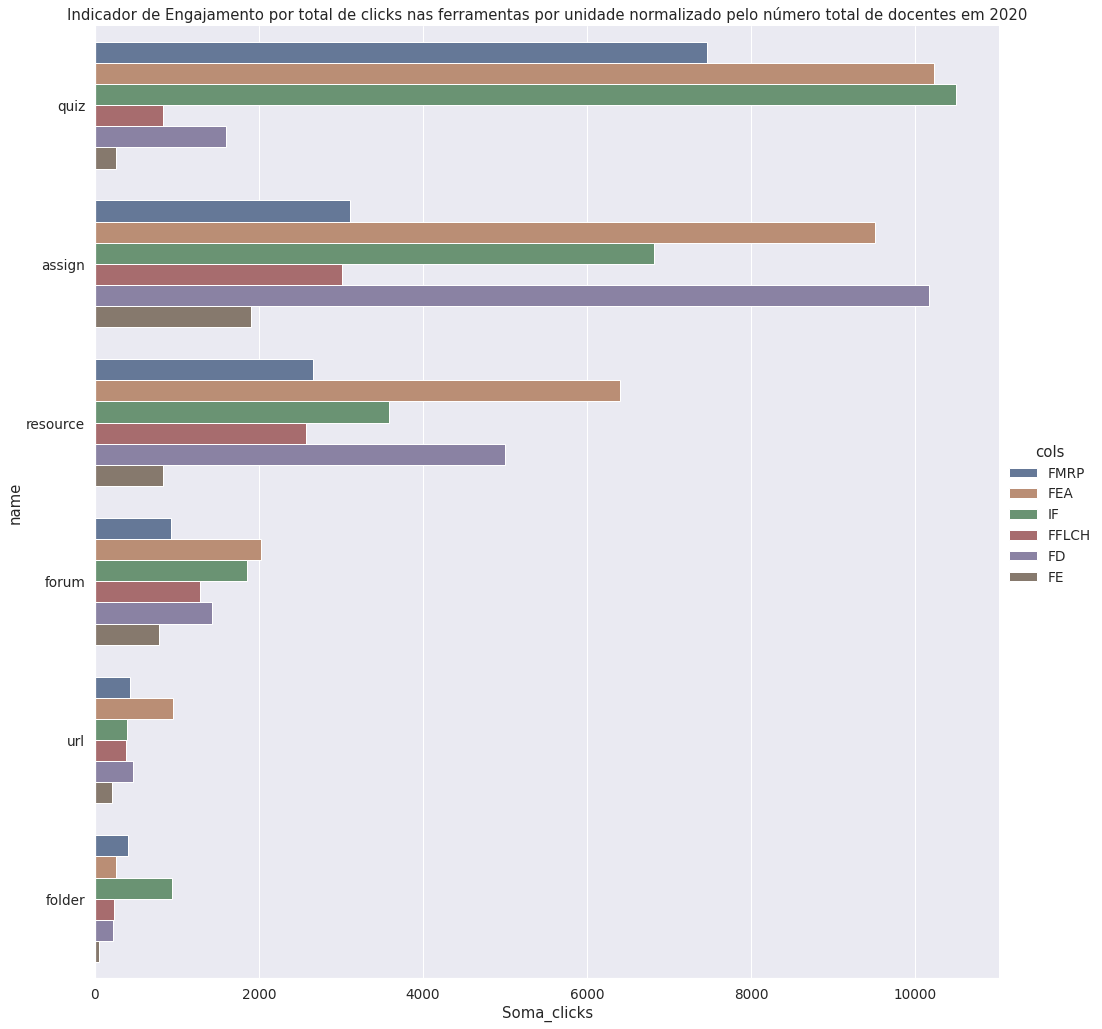

In [128]:
sns.set(font_scale = 1.24)
plt = df_normalizado_docentes.melt('name', var_name='cols', value_name='Soma_clicks')
g = sns.catplot(y="name", x="Soma_clicks", hue='cols', data=plt, kind="bar", height=14,saturation=.5)
g.set(title = "Indicador de Engajamento por total de clicks nas ferramentas por unidade normalizado pelo número total de docentes em 2020")

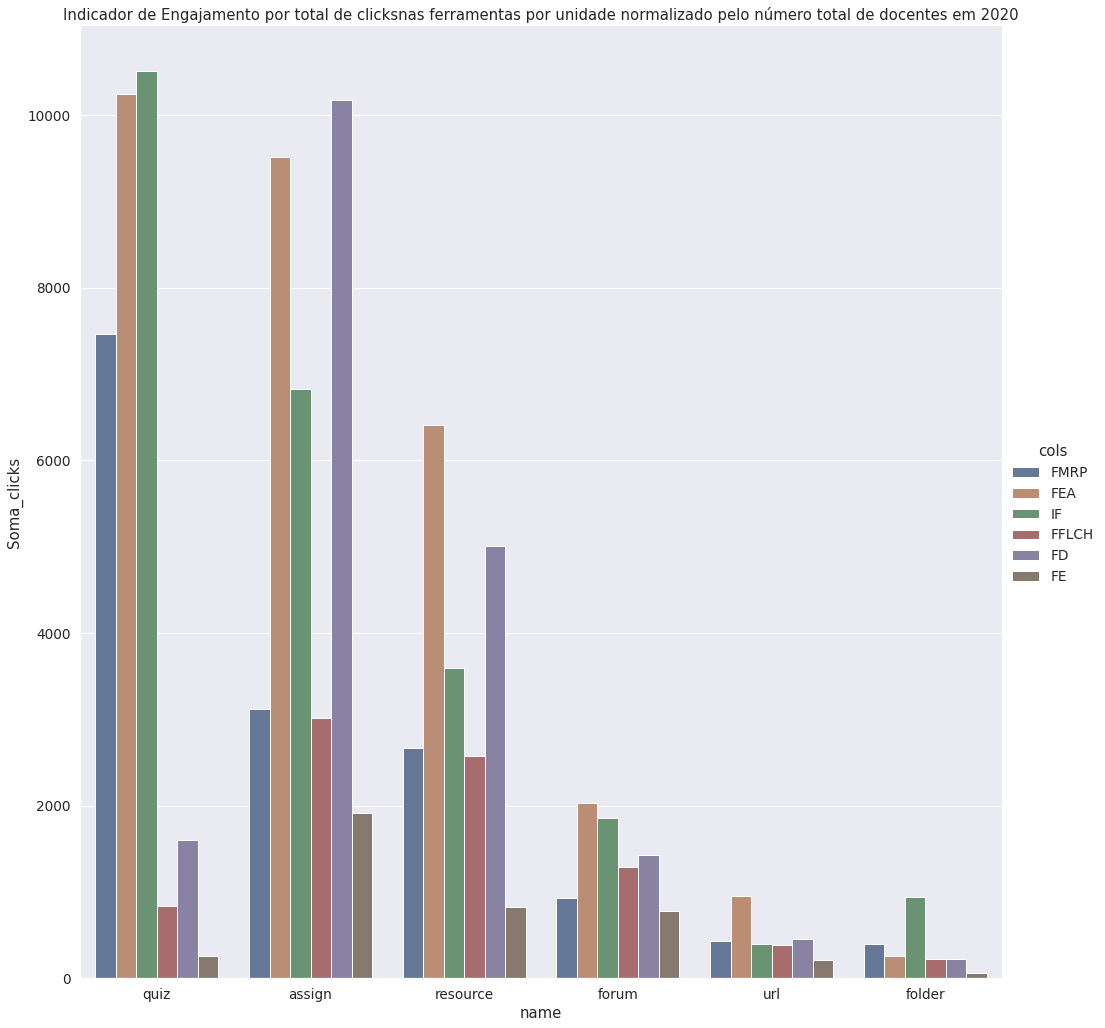

In [129]:
sns.set(font_scale = 1.24)
plt = df_normalizado_docentes.melt('name', var_name='cols', value_name='Soma_clicks')
g = sns.catplot(x="name", y="Soma_clicks", hue='cols', data=plt, kind="bar", height=14,saturation=.5)
g.set(title = "Indicador de Engajamento por total de clicksnas ferramentas por unidade normalizado pelo número total de docentes em 2020")

A diferença da parte 3 desse estudo das ferramentas usadas do E-disicplinas, analisando através de um indicador que soma a quantidade de clicks em cada uma para cada instituto no ano de 2020, é que na parte 4 normalizei em relação ao total de docentes de cada instituto, assim, o total de clicks é avaliado em relação ao tamanho do instituto medido pelo total de docentes, assim, institutos pequenos, podem possuir uma representatividade maior, pois o número absoluto entra em segundo plano, considerando uma margem média de clicks por coentes de cada unidade. Muito interessante, pois o resultado mostra mesmo uma diferença na normalização dos dados, onde o IF supera a FMRP no recurso quiz,sendo que no número absoluto esta mais próximo da metade.